STA 141B Project - A comparison of an NBA player's on court preformance against the expectations of their contract

1. Introduction
2. Data Acquisiton 
3. Data Process 
4. Approach
5. Data Analysis 
5b. General statistics 
5c. Data Analysis real 
6. Reports + visualization
7. Dicussion 
8. 

1. #### Introduction

The National Basketball Association (NBA) is the premiere American basketball league comprised of 30 teams from the United States and Canada. A player will receive larger compensation in their contract based on an assessment of skill and experience. As spectators, we generally assume that a larger salary indicates stronger aptitude and strength. However, this viewpoint heavily hinges on the individual while basketball wins depend upon the team as a whole. Such an assumption may not be a holistic signifier of player success but only on the individual level. The study examines the relationship between player statistics and salary for the 2023 to 2024 season to evaluate the validity of our assumption by taking into account team contribution metrics. It will identify patterns and anomalies, calculate a metric to determine players who are undervalued and overvalued(??), and assess the implications of these findings on team and the NBA's economics. By doing so, we may take an approach that aligns closer with the objectives of basketball teams.

2. #### Data acquisiton
The data set, composed of 554 players, contains four metrics that measure team contribution per player: RAPTOR, LEBRON, Player Efficiency Rating, and Win Share. We selected team contribution metrics rather than individual ones to standardize indicators of performance across positions; as individual statistics such as blocks and rebounds may vary based on one's role on the court, they are not a fair overall evaluation of player accomplishment. 
* RAPTOR is a measure of points that a player contributed per 100 possessions relative to a league average player. It takes Offensive and Defensive ratings. 
* LEBRON calculates the change in score when the player is on the court, stabilized to account for player position and variance. It takes Total, Offensive, and Defensive ratings. 
* Player Efficiency Rating (PER) measures a player's productivity per minute relative to a league average of 15.00, adjusted for pace. 
* Win Share assigns a number to a player based on their contributions to team wins during the season. 

To access general statistics about certain players, we will utilize a public API package that pulls from the NBA website (https://github.com/swar/nba_api?tab=readme-ov-file). We will also extract team salary cap, the official maximum salary per player (https://www.spotrac.com/nba/cap/), and salary information per player for the 2023 to 2024 season. 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# This code will allow us to find the cap space for the 24 season for all NBA teams
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000) 

# URL of the page
url = 'https://www.spotrac.com/nba/cap/'

# Send a GET request to the page
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Grab Table
table = soup.find('table', {'class': 'datatable'})

# Pandas dataframe conversion
df = pd.read_html(str(table))[0]

print(df)

    Rank                    Team   Win%  PlayersSigned  PlayersAvg Age     Total Cap    Cap Space* 1st ApronSpace 2nd ApronSpace Active CapAll Active CapTop 3     Dead Cap
0      1               Utah Jazz  0.438             15            23.8  $130,919,836    $5,101,164    $40,410,673            NaN  $122,774,242     $66,152,629   $8,145,594
1      2         Detroit Pistons  0.172             14            24.6  $135,598,371      $422,629    $35,247,629            NaN   $83,803,488     $42,031,943  $51,794,883
2      3           Orlando Magic  0.569             15            24.3  $139,355,784   $-3,334,784            NaN            NaN  $130,964,229     $47,450,000          NaN
3      4       San Antonio Spurs  0.215             15            22.7  $142,928,288   $-6,907,288    $29,416,585            NaN   $94,551,623     $44,260,680  $46,356,959
4      5       Charlotte Hornets  0.246             15            24.5  $143,055,717   $-7,034,717    $34,913,527            NaN   $97,074,9

As mentioned previously, we can also use the a public API called nba_api, which allows us to pull from the [NBA Website](https://www.nba.com/), which has publically available data on every player. Let's pull up up information on the current reigning MVP Joel Embiid of the philadelphia 76ers for his career statistics, current season statistics, and information on his contract with the 76ers currently. 

In [4]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats, playergamelog

# Find player ID
player_dict = players.get_players()
embiid = [player for player in player_dict if player['full_name'] == 'Joel Embiid'][0]
embiid_id = embiid['id']

# Fetch career statistics
career_stats = playercareerstats.PlayerCareerStats(player_id=embiid_id)
career_df = career_stats.get_data_frames()[0]

# Fetch current season statistics
current_season_stats = playergamelog.PlayerGameLog(player_id=embiid_id, season='2023')
current_season_df = current_season_stats.get_data_frames()[0]

print("Joel Embiid's Career Statistics:")
print(career_df)

# Print current season statistics
print("\nJoel Embiid's Current Season Statistics:")
print(current_season_df)

Joel Embiid's Career Statistics:
   PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  GP  GS     MIN  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV   PF   PTS
0     203954   2016-17        00  1610612755               PHI        23.0  31  31   786.0  200   429   0.466    36    98    0.367  191  244   0.783    61   182  243   66   27   76  117  112   627
1     203954   2017-18        00  1610612755               PHI        24.0  63  63  1912.0  510  1056   0.483    66   214    0.308  359  467   0.769   143   547  690  199   40  111  234  209  1445
2     203954   2018-19        00  1610612755               PHI        25.0  64  64  2154.0  580  1199   0.484    79   263    0.300  522  649   0.804   160   711  871  234   46  122  226  211  1761
3     203954   2019-20        00  1610612755               PHI        26.0  51  51  1506.0  382   801   0.477    57   172    0.331  351  435   0.807   141   452  593  152   45   6

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch the webpage
url = "https://www.basketball-reference.com/contracts/players.html"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the data table - you need to identify the correct table or data structure
# This is just an example; you'll need to adjust it based on the actual structure
table = soup.find('table', {'id': 'player-contracts'})

# Extract data and convert it to a DataFrame
# This part depends heavily on the structure of the table and the data you need
data = []
rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df2 = pd.DataFrame(data)
df2.replace('None', None, inplace=True)
df2.dropna(how='all', inplace=True)
headers = ["Name", "Tm", "2023-24", "2024-25", "2025-26", "2026-27", "2027-28", "2028-29", "2029-30"]
df2.columns = headers
print(df2)


                         Name   Tm      2023-24      2024-25      2025-26       2026-27       2027-28       2028-29       2029-30
2               Stephen Curry  GSW  $51,915,615  $55,761,216  $59,606,817  $167,283,648          None          None          None
3                Kevin Durant  PHO  $47,649,433  $51,179,021  $54,708,609  $153,537,063          None          None          None
4                Nikola Jokić  DEN  $47,607,350  $51,415,938  $55,224,526   $59,033,114   $62,841,702  $213,280,928          None
5                 Joel Embiid  PHI  $47,607,350  $51,415,938  $55,224,526   $59,033,114  $154,247,814          None          None
6                LeBron James  LAL  $47,607,350  $51,415,938  $47,607,350          None          None          None          None
7                Bradley Beal  PHO  $46,741,590  $50,203,930  $53,666,270   $57,128,610  $150,611,790          None          None
8       Giannis Antetokounmpo  MIL  $45,640,084  $48,787,676  $68,302,746   $73,766,966   

5. Data Analysis
One of the general correlation approach we can use to see if how much money teams are spending affects how often they win is to compare their yearly cap space with their win percentage. 

                            OLS Regression Results                            
Dep. Variable:                   Win%   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     7.177
Date:                Tue, 12 Mar 2024   Prob (F-statistic):             0.0122
Time:                        14:20:50   Log-Likelihood:                 430.13
No. Observations:                  30   AIC:                            -856.3
Df Residuals:                      28   BIC:                            -853.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.536e-08   2.13e-07     -0.307      0.7

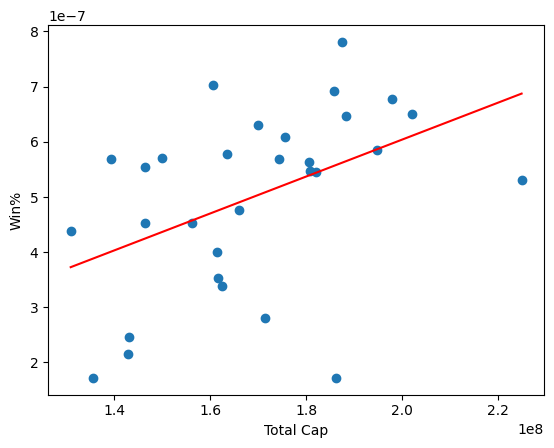

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming that "Win%" and "Total Cap" are columns in your dataframe
# Convert "Total Cap" to numeric, removing any non-numeric characters
df['Total Cap'] = df['Total Cap'].replace('[\$,]', '', regex=True).astype(float)

# Convert "Win%" to numeric, removing the '%' sign
df['Win%'] = df['Win%'].astype(str)
df['Win%'] = df['Win%'].str.rstrip('%').astype('float') / 100.0

# Define the dependent variable (y) and the independent variable (X)
y = df['Win%']
X = df['Total Cap']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
print(results.summary())

plt.scatter(X['Total Cap'], y)
# Generate the prediction values along the line of best fit
y_pred = results.predict(X)
# Plot the regression line
plt.plot(X['Total Cap'], y_pred, color='red')
# Set the labels for the x and y axes
plt.xlabel('Total Cap')
plt.ylabel('Win%')
# Display the plot
plt.show()

In [32]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import statsmodels.api as sm
import pandas as pd

# Get player's ID
player_dict = players.get_players()

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Player', 'coef_PTS', 'coef_REB', 'coef_AST', 'intercept', 'R-squared'])

for player_name in df2['Name']:
    player = [player for player in player_dict if player['full_name'] == player_name]
    if not player:
        continue
    player_id = player[0]['id']

    # Get player's game log
    gamelog = playergamelog.PlayerGameLog(player_id)
    df = gamelog.get_data_frames()[0]

    # Select the stats for regression
    X = df[['PTS', 'REB', 'AST']].apply(pd.to_numeric, errors='coerce')
    y = pd.to_numeric(df2[df2['Name'] == player_name]['2023-24'], errors='coerce')  # replace '2023-24' with the salary column

# Combine X and y into a single DataFrame
    data = pd.concat([X, y], axis=1)

# Drop rows with NaN values
    data = data.dropna()

# Separate X and y
    X = data[['PTS', 'REB', 'AST']]
    y = data['2023-24']  # replace '2023-24' with the salary column

# Add a constant to the independent value
    X = sm.add_constant(X)

# Conduct the ordinary least squares regression
    model = sm.OLS(y, X)
    results = model.fit()

    # Append the results to the results DataFrame
    results_df = results_df.append({
        'Player': player_name,
        'coef_PTS': results.params['PTS'],
        'coef_REB': results.params['REB'],
        'coef_AST': results.params['AST'],
        'intercept': results.params['const'],
        'R-squared': results.rsquared
    }, ignore_index=True)

# Print out the results
print(results_df)

ValueError: zero-size array to reduction operation maximum which has no identity

HI
Hiv kdjvdofisljgdghuekjdjkd